In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

import numpy as np
import matplotlib.pyplot as plt

## 设置路径

In [2]:
path_pre = '../../'
path_original_dataset = path_pre + 'original-dataset/'
path_intermediate_dataset = path_pre + 'intermediate-dataset/'

## 加载数据

In [3]:
test_df = pd.read_hdf(path_intermediate_dataset + 'test.h5')
test_df.head()

,instanceID,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,1,-1,310000,3745,1164848,3451,1,3
1,2,-1,310000,2284,2127247,1613,1,3
2,3,-1,310000,1456,2769125,5510,2,1
3,4,-1,310000,4565,9762,4113,2,3
4,5,-1,310000,49,2513636,3615,1,3


In [4]:
test_df.index.size

338489

In [4]:
test_df['connectionType'].value_counts()

1    285998
2     34016
0      8906
3      6762
4      2807
Name: connectionType, dtype: int64

In [5]:
test_df['telecomsOperator'].value_counts()

1    181473
3     74785
2     72790
0      9441
Name: telecomsOperator, dtype: int64

### 统计每一个用户的点击次数

In [7]:
click_count = test_df['userID'].value_counts()
distribution_click_count = click_count.value_counts()

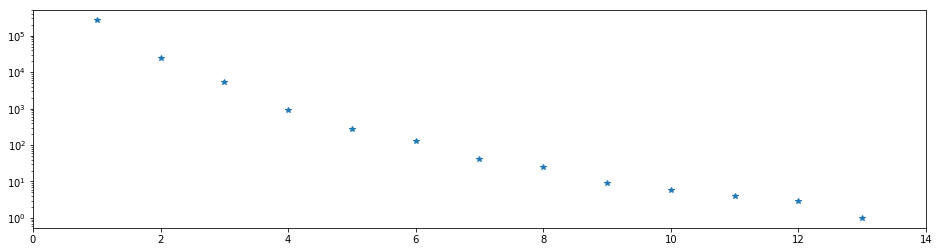

In [12]:
distribution_click_count.plot(figsize=(16,4), style='*', logy=True)
plt.xlim([0, 14])
plt.show()

In [5]:
click_count.reset_index(inplace=True)
click_count.columns = ['userID', 'click_count']
click_count.head()

,userID,click_count
0,2299240,16
1,2651201,13
2,1132996,12
3,302211,12
4,1971662,12


In [6]:
ad_df = pd.read_hdf(path_intermediate_dataset + 'ad.h5')
ad_df.head()

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2
1,4565,3593,632,3,465,1
2,3170,1593,205,54,389,1
3,6566,2390,205,54,389,1
4,5187,411,564,3,465,1


In [7]:
test_df = test_df.merge(ad_df[['creativeID', 'appID']], how='left', on='creativeID')
# 构造 'userID-appID' 列
test_df['userID-appID'] = test_df['userID'].astype(str) + '-' + test_df['appID'].astype(str)
test_df.head()

,instanceID,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,appID,userID-appID
0,1,-1,310000,3745,1164848,3451,1,3,14,1164848-14
1,2,-1,310000,2284,2127247,1613,1,3,14,2127247-14
2,3,-1,310000,1456,2769125,5510,2,1,465,2769125-465
3,4,-1,310000,4565,9762,4113,2,3,465,9762-465
4,5,-1,310000,49,2513636,3615,1,3,14,2513636-14


In [8]:
userID_appID_test = pd.read_hdf(path_intermediate_dataset + 'userID_appID_for_test.h5')
userID_appID_test.head()

0    1232847-360
1    1240591-360
2    2082062-360
3    2549676-383
4    1062393-360
dtype: object

In [9]:
indexer = test_df['userID-appID'].isin(userID_appID_test)

In [10]:
indexer.loc[indexer == True].index.size

4202

对于那些已经有安装行为的 'userID-appID', 应该都预测为0